In [2]:
from astroquery.gaia import Gaia
from astroquery.irsa import Irsa
import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

C:\Users\gordo\AppData\Local\Temp\ipykernel_36772\1910261043.py:2: DeprecationWarning: the ``irsa`` module has been moved to astroquery.ipac.irsa, please update your imports.
  from astroquery.irsa import Irsa


In [3]:
# Query just Gaia DR3 for stars within 1 degree of the centre of M67 and brighter than G=14
query = f"""
SELECT *
FROM gaiadr3.gaia_source AS gaia
WHERE DISTANCE(POINT(132.825, 11.8), POINT(gaia.ra, gaia.dec)) < 1.0
AND gaia.phot_g_mean_mag < 14.0
"""
# Upload the 2MASS coordinates table for crossmatching
job = Gaia.launch_job_async(query=query)
gaiadr3_match = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [4]:
gaiadr3_match

solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,

In [5]:
# Query 2MASS data around M67
twomass_data = Irsa.query_region(SkyCoord(ra=132.825*u.degree, dec=11.8*u.degree), catalog="fp_psc", spatial="Cone", radius=1*u.degree)

In [6]:
twomass_data

ra,dec,clon,clat,err_maj,err_min,err_ang,designation,j_m,j_cmsig,j_msigcom,j_snr,h_m,h_cmsig,h_msigcom,h_snr,k_m,k_cmsig,k_msigcom,k_snr,ph_qual,rd_flg,bl_flg,cc_flg,ndet,gal_contam,mp_flg,hemis,xdate,scan,glon,glat,a,dist_opt,phi_opt,b_m_opt,vr_m_opt,nopt_mchs,ext_key,dist,angle,j_h,h_k,j_k
deg,deg,,,arcsec,arcsec,deg,,mag,mag,mag,,mag,mag,mag,,mag,mag,mag,,,,,,,,,,,,deg,deg,,arcsec,deg,mag,mag,,,arcsec,deg,,,
float64,float64,object,object,float64,float64,int32,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,int32,int32,object,object,int32,float64,float64,object,float64,int32,float64,float64,int32,int32,float64,float64,float64,float64,float64
133.068005,11.960207,08h52m16.32s,11d57m36.75s,0.11,0.11,55,08521632+1157367,16.073,0.067,0.068,14.4,15.333,0.090,0.090,12.2,15.428,0.163,0.163,7.0,AAC,222,111,000,061605,0,0,n,2000-02-16,43,215.642,32.179,U,0.6,198,18.10,17.20,1,--,1032.234068,56.006693,0.74,-0.095,0.645
133.062072,11.977266,08h52m14.90s,11d58m38.16s,0.13,0.12,92,08521489+1158381,16.270,0.089,0.090,12.0,15.515,0.109,0.109,10.3,15.286,0.146,0.146,8.0,ABB,222,111,000,060606,0,0,n,2000-02-16,43,215.621,32.181,0,--,--,--,--,0,--,1051.0585,52.591421,0.755,0.229,0.984
133.041034,12.005770,08h52m09.85s,12d00m20.77s,0.31,0.29,14,08520984+1200207,17.089,0.168,0.168,5.9,16.446,0.222,0.222,4.5,16.099,0.240,0.240,4.2,CDD,222,111,000,060606,0,0,n,1997-11-15,132,215.580,32.174,0,--,--,--,--,0,--,1062.009344,45.749475,0.643,0.347,0.99
133.049246,11.997709,08h52m11.82s,11d59m51.75s,0.11,0.06,0,08521181+1159517,13.462,0.020,0.024,165.1,13.210,0.026,0.027,89.1,13.087,0.026,0.028,67.1,AAA,222,111,000,666666,0,0,n,1997-11-15,132,215.592,32.178,U,0.4,230,15.00,13.90,1,--,1063.294513,47.957405,0.252,0.123,0.375
133.025264,12.029343,08h52m06.06s,12d01m45.63s,0.11,0.06,0,08520606+1201456,14.257,0.025,0.028,79.4,13.801,0.032,0.033,51.7,13.665,0.033,0.034,39.4,AAA,222,111,000,666666,0,0,n,1997-11-15,132,215.547,32.170,U,0.7,239,16.70,15.30,1,--,1085.949862,40.489791,0.456,0.136,0.592
133.018306,12.037612,08h52m04.39s,12d02m15.40s,0.18,0.18,17,08520439+1202154,16.379,0.103,0.104,11.2,15.786,0.152,0.152,8.3,15.750,--,--,--,ABU,220,110,000,062400,0,0,n,1997-11-15,132,215.535,32.167,U,1.0,196,17.70,16.90,1,--,1093.314722,38.499788,0.593,--,--
133.018885,12.038982,08h52m04.53s,12d02m20.34s,0.21,0.17,180,08520453+1202203,16.708,0.128,0.129,8.3,15.836,0.132,0.133,7.9,15.548,0.151,0.151,7.0,BBC,222,111,c00,060406,0,0,n,1997-11-15,132,215.533,32.168,U,4.4,24,17.70,16.90,1,--,1098.44355,38.422672,0.872,0.288,1.16
133.003925,12.051920,08h52m00.94s,12d03m06.91s,0.17,0.14,2,08520094+1203069,16.218,0.080,0.081,13.0,15.615,0.120,0.120,9.7,15.108,0.100,0.100,10.4,ABA,222,111,000,160405,0,0,n,1997-11-15,132,215.512,32.161,U,0.8,238,19.90,18.60,1,--,1104.388695,34.777572,0.603,0.507,1.11


In [7]:
# Prepare the 2MASS data with coordinates for crossmatching
twomass_coords = SkyCoord(twomass_data['ra'], twomass_data['dec'], unit=(u.deg, u.deg))
twomass_source_ids_table = Table([twomass_data['ph_qual'], twomass_data['j_m'], twomass_data['k_m'], twomass_data['ra'], twomass_data['dec']], names=['ph_qual', 'j_m', 'k_m', 'ra', 'dec'])
print(twomass_source_ids_table)

ph_qual  j_m    k_m       ra        dec    
         mag    mag      deg        deg    
------- ------ ------ ---------- ----------
    AAC 16.073 15.428 133.068005  11.960207
    ABB 16.270 15.286 133.062072  11.977266
    CDD 17.089 16.099 133.041034  12.005770
    AAA 13.462 13.087 133.049246  11.997709
    AAA 14.257 13.665 133.025264  12.029343
    ABU 16.379 15.750 133.018306  12.037612
    BBC 16.708 15.548 133.018885  12.038982
    ABA 16.218 15.108 133.003925  12.051920
    ABC 16.263 15.487 133.075503  11.986448
    ...    ...    ...        ...        ...
    AAA 14.452 13.637 133.545208  11.947006
    BUU 16.554 15.709 133.554804  11.907258
    AAA 14.649 13.961 133.562856  11.863834
    AAA 14.575 14.127 133.562405  11.947103
    AAA 15.335 14.519 133.569174  11.943874
    AAA 15.782 14.981 133.572522  11.942344
    AAA 14.792 14.415 133.577236  11.927119
    AAB 15.514 15.088 133.592891  11.924237
    AAA 15.139 14.342 133.596603  11.944457
    CCU 16.669 15.498 133.615499

In [8]:
# Since the 2MASS catalog doesn't have a source_id column, we can crossmatch using the coordinates.
# We can select a crossmatching radius for each source and I have chosen 0.003 degrees since the ra of M67 is correct to three decimal places.
# This radius is chosen to account for differences in exact positions of sources between catalogs.
query = f"""
SELECT *
FROM gaiadr3.gaia_source AS gaia
JOIN TAP_UPLOAD.t1 AS twomass
ON 1=CONTAINS(POINT('ICRS', gaia.ra, gaia.dec), CIRCLE('ICRS', twomass.ra, twomass.dec, 0.003))
WHERE DISTANCE(POINT(132.825, 11.8), POINT(gaia.ra, gaia.dec)) < 1
AND gaia.phot_g_mean_mag < 14.0
"""
# Upload the 2MASS coordinates table for crossmatching
job = Gaia.launch_job_async(query=query, upload_resource=twomass_source_ids_table, upload_table_name="t1")
gaiadr3_match = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [9]:
gaiadr3_match

solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,ph_qual,j_m,k_m,ra_2,dec_2
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,---,mag,mag,deg,deg
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,f

We get 1029 matches just from Gaia DR3 and 500 from just 2MASS. When we crossmatch the two catalogs within 0.003 degrees or approximately 10 arcseconds, we get 43 stars.

In [10]:
query = f"""
SELECT *
FROM gaiadr3.gaia_source AS gaia
JOIN TAP_UPLOAD.t1 AS twomass
ON 1=CONTAINS(POINT('ICRS', gaia.ra, gaia.dec), CIRCLE('ICRS', twomass.ra, twomass.dec, 0.003))
WHERE DISTANCE(POINT(132.825, 11.8), POINT(gaia.ra, gaia.dec)) < 1
AND gaia.phot_g_mean_mag < 14.0
AND twomass.ph_qual = 'AAA'
"""
# Upload the 2MASS coordinates table for crossmatching
job = Gaia.launch_job_async(query=query, upload_resource=twomass_source_ids_table, upload_table_name="t1")
gaiadr3_match = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


There were 4 stars with bad 2MASS photometry.

In [11]:
gaiadr3_match

solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,ph_qual,j_m,k_m,ra_2,dec_2
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,---,mag,mag,deg,deg
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,f

In [12]:
query = f"""
SELECT *
FROM gaiadr3.gaia_source AS gaia
JOIN TAP_UPLOAD.t1 AS twomass
ON 1=CONTAINS(POINT('ICRS', gaia.ra, gaia.dec), CIRCLE('ICRS', twomass.ra, twomass.dec, 0.01))
WHERE DISTANCE(POINT(132.825, 11.8), POINT(gaia.ra, gaia.dec)) < 1
AND gaia.phot_g_mean_mag < 14.0
AND twomass.ph_qual = 'AAA'
AND gaia.parallax > 0
"""
# Upload the 2MASS coordinates table for crossmatching
job = Gaia.launch_job_async(query=query, upload_resource=twomass_source_ids_table, upload_table_name="t1")
gaiadr3_match = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


There were no stars with negative parallaxes in the Gaia data. After these two cuts there are 39 stars remaining.

In [13]:
gaiadr3_match

solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,ph_qual,j_m,k_m,ra_2,dec_2
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,---,mag,mag,deg,deg
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,f

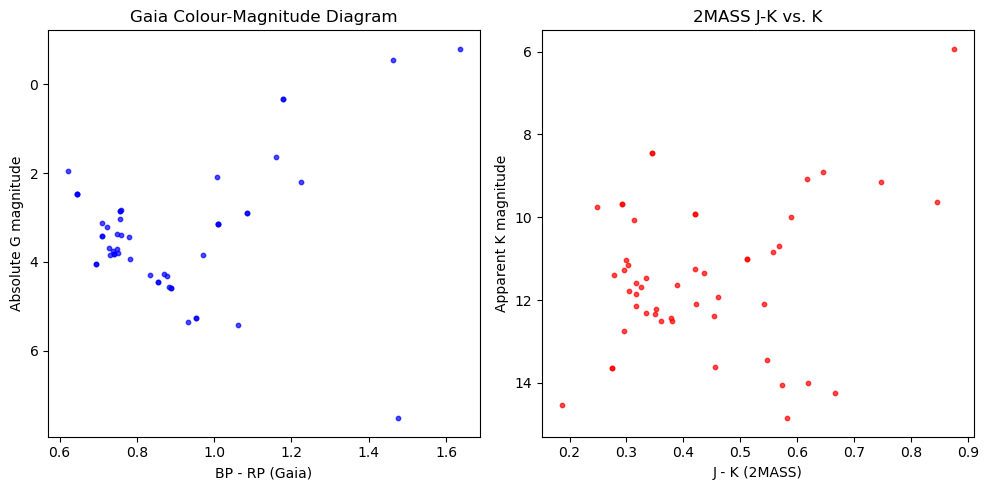

In [14]:
# Calculate distance in parsecs
distance_pc = 1000.0 / gaiadr3_match['parallax']

# Calculate the absolute G magnitude
absolute_g = gaiadr3_match['phot_g_mean_mag'] - 5 * np.log10(distance_pc) + 5

# Calculate color index J-Ks
j_ks = gaiadr3_match['j_m'] - gaiadr3_match['k_m']

# Set up the figure with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Panel (a): Gaia CMD (BP-RP vs. Absolute G magnitude)
ax1.scatter(gaiadr3_match['bp_rp'], absolute_g, s=10, c='blue', alpha=0.7)
ax1.set_xlabel('BP - RP (Gaia)')
ax1.set_ylabel('Absolute G magnitude')
ax1.set_title('Gaia Colour-Magnitude Diagram')
ax1.invert_yaxis()  # To have the brightest stars at the top

# Panel (b): 2MASS J-Ks vs. apparent Ks magnitude
ax2.scatter(j_ks, gaiadr3_match['k_m'], s=10, c='red', alpha=0.7)
ax2.set_xlabel('J - K (2MASS)')
ax2.set_ylabel('Apparent K magnitude')
ax2.set_title('2MASS J-K vs. K')
ax2.invert_yaxis()  # To have the brightest stars at the top

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('figures\cmds_M67.png', dpi=200)

# Show the plot
plt.show()
